<a href="https://colab.research.google.com/github/igormatuchewski/igormatuchewski/blob/main/Analise_Brasileirao_A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importando as bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Alterando o estilo dos gráficos

plt.style.use('ggplot')

In [2]:
# Carregando a base de dados

df = pd.read_csv('/content/drive/MyDrive/Curso Python/Projeto Piloto - Brasileirão/brasileirao.csv')

In [3]:
# Verificando a dimensão
df.shape

(427, 12)

In [4]:
# Verificando a estrutura do database
df.head()

,season,place,acronym,team,points,played,won,draw,loss,goals_for,goals_against,goals_diff
0,2003,1,CRU,Cruzeiro,100,46,31,7,8,102,47,55
1,2003,2,SAN,Santos,87,46,25,12,9,93,60,33
2,2003,3,SAO,SaoPaulo,78,46,22,12,12,81,67,14
3,2003,4,SCA,SaoCaetano,74,46,19,14,13,53,37,16
4,2003,5,CFC,Coritiba,73,46,21,10,15,67,58,9


In [5]:
# Analisando se há missings
df.isnull().sum()

season           0
place            0
acronym          0
team             0
points           0
played           0
won              0
draw             0
loss             0
goals_for        0
goals_against    0
goals_diff       0
dtype: int64

Não há missings na nossa base, portanto ela está bem consistente.

In [68]:
df['temporada'] = df['temporada'].astype(str)
df['temporada'].dtype


dtype('O')

In [63]:
# Conferindo as colunas já existentes
df.columns

Index(['temporada', 'colocacao', 'sigla', 'time', 'pontos',
       'partidas_disputadas', 'vitorias', 'empates', 'derrotas', 'gols_pro',
       'gols_contra', 'saldo_gols', 'pontos_possiveis', 'aproveitamento',
       'MediaGolsPro', 'MediaGolsContra'],
      dtype='object')

In [74]:
# Renomeando as colunas e traduzindo
df.rename(columns={
    'season' : 'temporada',
    'place' : 'colocacao',
    'acronym' : 'sigla',
    'team' : 'time',
    'points' : 'pontos',
    'played' : 'partidas_disputadas',
    'won' : 'vitorias',
    'draw' : 'empates',
    'loss' : 'derrotas',
    'goals_for' : 'gols_pro',
    'goals_against' : 'gols_contra',
    'goals_diff' : 'saldo_gols'
}, inplace = True)

In [66]:
# Verificando as alterações
df.head(1)

,temporada,colocacao,sigla,time,pontos,partidas_disputadas,vitorias,empates,derrotas,gols_pro,gols_contra,saldo_gols,pontos_possiveis,aproveitamento,MediaGolsPro,MediaGolsContra
0,2003,1,CRU,Cruzeiro,100,46,31,7,8,102,47,55,138,72.463768,2.217391,1.021739


In [67]:
# Verificando o tipo das colunas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 427 entries, 0 to 426
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   temporada            427 non-null    object 
 1   colocacao            427 non-null    int64  
 2   sigla                427 non-null    object 
 3   time                 427 non-null    object 
 4   pontos               427 non-null    int64  
 5   partidas_disputadas  427 non-null    int64  
 6   vitorias             427 non-null    int64  
 7   empates              427 non-null    int64  
 8   derrotas             427 non-null    int64  
 9   gols_pro             427 non-null    int64  
 10  gols_contra          427 non-null    int64  
 11  saldo_gols           427 non-null    int64  
 12  pontos_possiveis     427 non-null    int64  
 13  aproveitamento       427 non-null    float64
 14  MediaGolsPro         427 non-null    float64
 15  MediaGolsContra      427 non-null    flo

Verifiquei que a coluna de temporada inicialmente estava como int64 e não faz sentido para nós somarmos os anos, portanto vou realizar a alteração da tipagem de dados dessa coluna.

In [70]:
df['temporada'] = df['temporada'].astype(str)
# Checando se a tipagem da coluna foi alterada
df['temporada'].dtype

dtype('O')

In [10]:
# Verificando o ano de inicio e de fim dos dados do Campeonato Brasileiro
ano_inicio = df['temporada'].min()
ano_fim = df['temporada'].max()
print(ano_inicio)
print(ano_fim)

2003
2023


In [75]:
df

,temporada,colocacao,sigla,time,pontos,partidas_disputadas,vitorias,empates,derrotas,gols_pro,gols_contra,saldo_gols,pontos_possiveis,aproveitamento,MediaGolsPro,MediaGolsContra
0,2003,1,CRU,Cruzeiro,100,46,31,7,8,102,47,55,138,72.463768,2.217391,1.021739
1,2003,2,SAN,Santos,87,46,25,12,9,93,60,33,138,63.043478,2.021739,1.304348
2,2003,3,SAO,SaoPaulo,78,46,22,12,12,81,67,14,138,56.521739,1.760870,1.456522
3,2003,4,SCA,SaoCaetano,74,46,19,14,13,53,37,16,138,53.623188,1.152174,0.804348
4,2003,5,CFC,Coritiba,73,46,21,10,15,67,58,9,138,52.898551,1.456522,1.260870
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
422,2023,16,ECB,Bahia,44,38,12,8,18,50,53,-3,114,38.596491,1.315789,1.394737
423,2023,17,SAN,Santos,43,38,11,10,17,39,64,-25,114,37.719298,1.026316,1.684211
424,2023,18,GOI,Goias,38,38,9,11,18,36,53,-17,114,33.333333,0.947368,1.394737
425,2023,19,CFC,Coritiba,30,38,8,6,24,41,73,-32,114,26.315789,1.078947,1.921053


In [12]:
# Verificando a quantidade de times diferentes no dataframe
df['time'].nunique()

43

In [78]:
# Somando a quantidade de pontos conquistados por time no período analisado
pontos_por_time = df.groupby('time')['pontos'].sum().sort_values(ascending = False)

Text(0.5, 1.0, 'TOP10 - Pontos Ganhos por Equipe | 2003 - 2023')

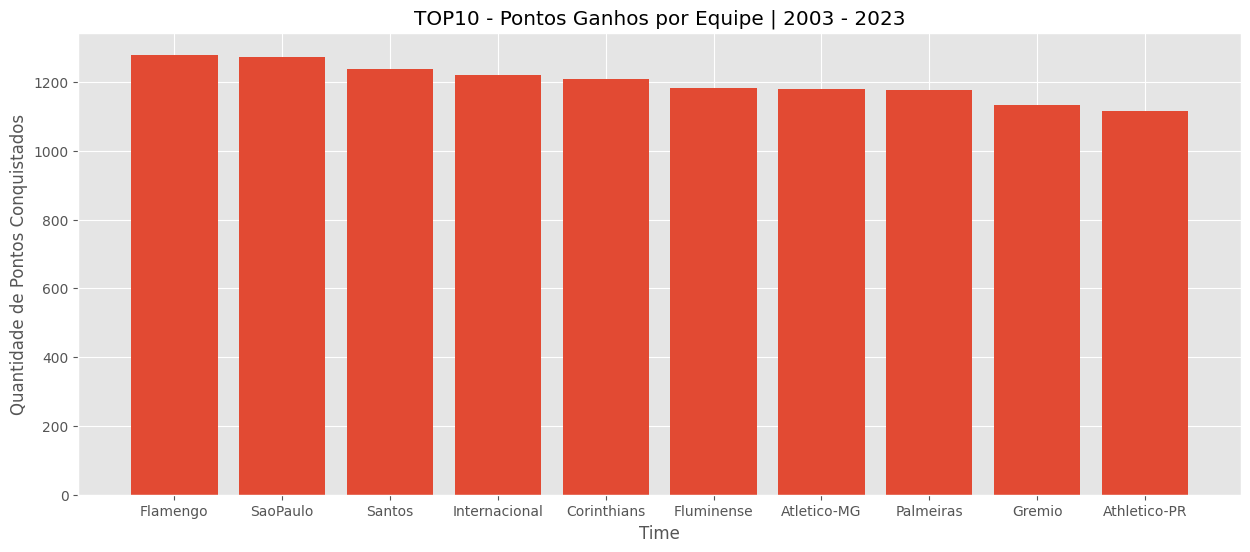

In [109]:
# Dispondo um TOP10 de pontos ganhos por equipe em um gráfico de barras

top10_pontos = pontos_por_time.head(10)

plt.figure(figsize=(15,6))
plt.bar(top10_pontos.index, top10_pontos.values)
plt.ylabel('Quantidade de Pontos Conquistados')
plt.xlabel('Time')
plt.title('TOP10 - Pontos Ganhos por Equipe | 2003 - 2023')

In [77]:
# Contando a quantidade de jogos disputados por equipe
partidas_por_time = df.groupby('time')['partidas_disputadas'].sum().sort_values(ascending = False)

Text(0.5, 1.0, 'TOP10 - Equipes que mais Jogaram | 2003 - 2023')

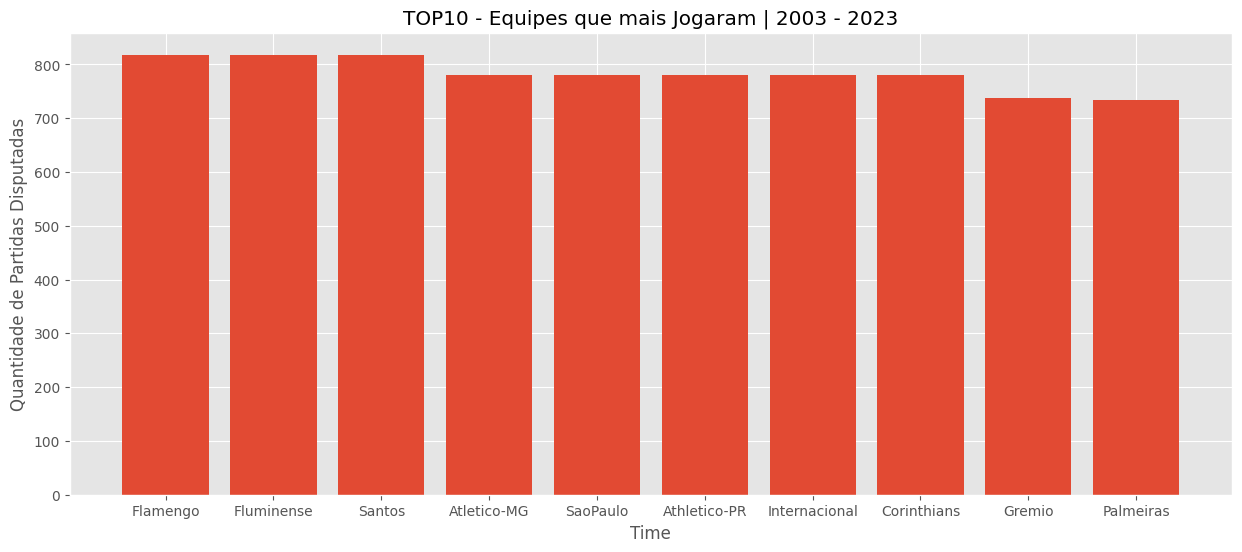

In [108]:
# Dispondo um TOP10 de partidas disputadas por equipe em um gráfico de barras
top10_partidas = partidas_por_time.head(10)

plt.figure(figsize=(15,6))
plt.bar(top10_partidas.index, top10_partidas.values)
plt.ylabel('Quantidade de Partidas Disputadas')
plt.xlabel('Time')
plt.title('TOP10 - Equipes que mais Jogaram | 2003 - 2023')

Apenas realizando essa análise simples já podemos notar uma correlação relativamente óbvia, quanto mais partidas disputadas mais pontos ganhos.

Todos os times que estão no TOP10 pontos ganhos também estão no TOP10 partidas disputadas.

Agora já sabendo que existe, vamos verificar o quão forte é essa correlação.

In [17]:
df['pontos'].corr(df['partidas_disputadas'])

0.2805480353671191

Após a análise podemos verificar que, entre o TOP10 a correlação aparenta ser extremamente forte mas, dessa forma estávamos vendo menos de 1/4 de todos os times disponíveis no dataframe..

Quando extendemos para o todo, notamos que a correlação não é tão forte quanto eu imaginava visto que, quanto mais próximo de 1 maior é a correlação.

In [80]:
# Agora, no mesmo sentido, vamos verificar o quão forte é a correlação entre partidas disputadas, derrotas, empates e partidas disputadas
# Verificando a quantidade de derrotas por equipe

derrotas_por_time = df.groupby('time')['derrotas'].sum().sort_values(ascending = False)

Text(0.5, 1.0, 'TOP10 - Derrotas por Equipe | 2003 - 2023')

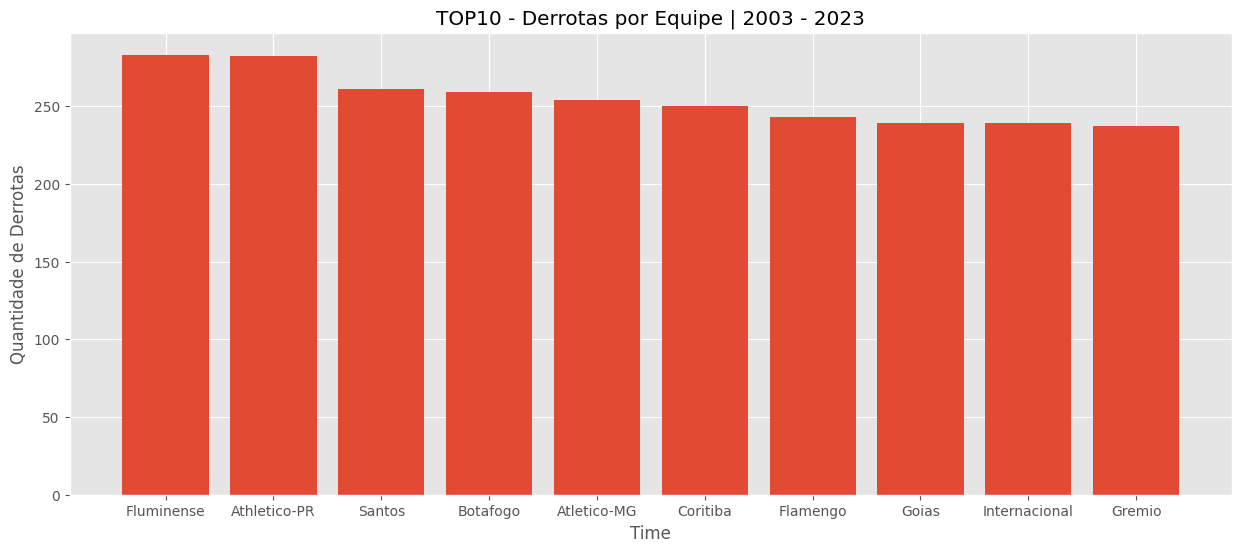

In [107]:
# Criando o TOP10 de derrotas e plotando em um gráfico
top10_derrotas = derrotas_por_time.head(10)

plt.figure(figsize=(15,6))
plt.bar(top10_derrotas.index, top10_derrotas.values)
plt.ylabel('Quantidade de Derrotas')
plt.xlabel('Time')
plt.title('TOP10 - Derrotas por Equipe | 2003 - 2023')

In [81]:
# Contabilizando a quantidade de vitórias por equipe
vitorias_por_time = df.groupby('time')['vitorias'].sum().sort_values(ascending = False)

Text(0.5, 1.0, 'TOP10 - Vitórias por Equipe | 2003 - 2023')

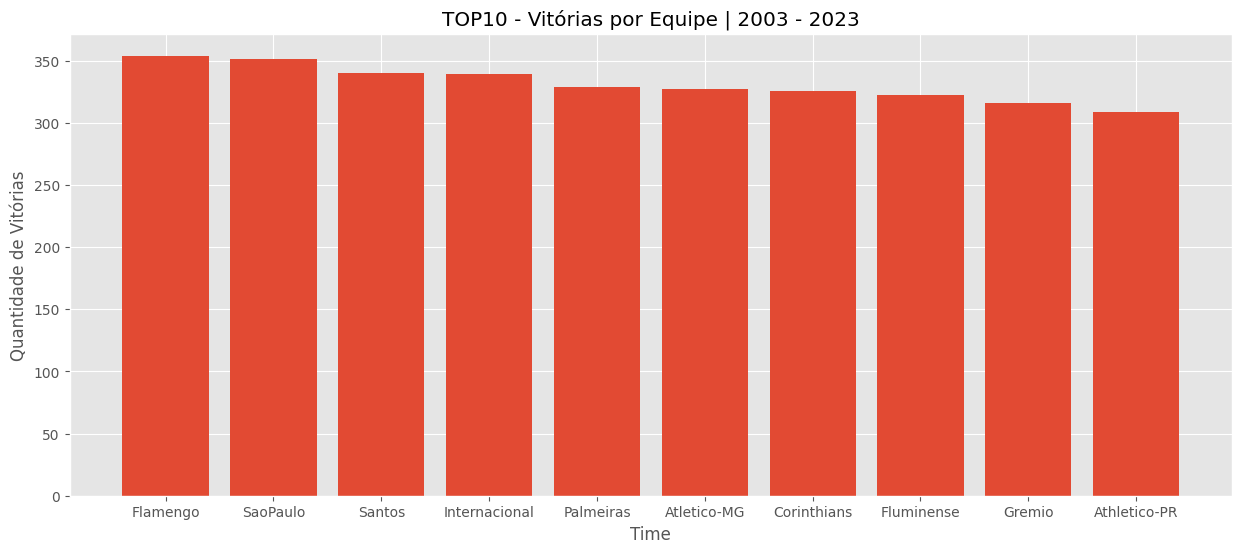

In [106]:
# Criando o TOP10 de vitórias e plotando em um gráfico
top10_vitorias = vitorias_por_time.head(10)

plt.figure(figsize=(15,6))
plt.bar(top10_vitorias.index, top10_vitorias.values)
plt.ylabel('Quantidade de Vitórias')
plt.xlabel('Time')
plt.title('TOP10 - Vitórias por Equipe | 2003 - 2023')

Novamente podemos notas algumas correlações com o gráfico, mas falta agora a quantidade de empates, vamos calcular.

In [82]:
# Contabilizando a quantidade de empates por equipe
empates_por_time = df.groupby('time')['empates'].sum().sort_values(ascending = False)

Text(0.5, 1.0, 'TOP10 - Empates x Equipe')

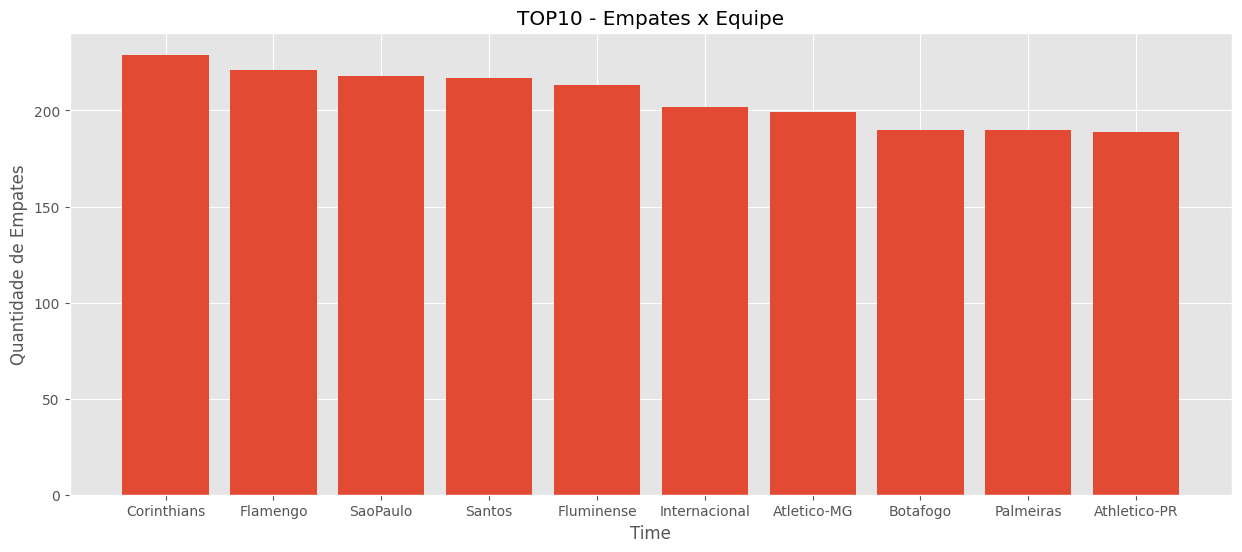

In [23]:
# Criando o TOP10 de empates e plotando em um gráfico
top10_empates = empates_por_time.head(10)

plt.figure(figsize=(15,6))
plt.bar(top10_empates.index, top10_empates.values)
plt.ylabel('Quantidade de Empates')
plt.xlabel('Time')
plt.title('TOP10 - Empates por Equipe | 2003 - 2023')

Agora, após ter verificado algumas correlações e o desempenho de algumas equipes, vamos verificar de fato as correlações.

In [24]:
# Verificando as correlações entre Partidas Disputadas, Vitórias, Derrotas e Empates

corr_partidasDisp_derrotas = df['partidas_disputadas'].corr(df['derrotas'])
corr_partidasDisp_vitorias = df['partidas_disputadas'].corr(df['vitorias'])
corr_partidasDisp_empates = df['partidas_disputadas'].corr(df['empates'])

print(f'Correlação Partidas Disputadas x Vitórias: {corr_partidasDisp_vitorias}')
print(f'Correlação Partidas Disputadas x Derrotas: {corr_partidasDisp_derrotas}')
print(f'Correlação Partidas Disputadas x Empates: {corr_partidasDisp_empates}')

Correlação Partidas Disputadas x Vitórias: 0.2497882126382564
Correlação Partidas Disputadas x Derrotas: 0.2554046341557994
Correlação Partidas Disputadas x Empates: 0.15183920660751152


Com isso, verificamos portanto que as correlações são bem próximas no que se refere a Vitórias e Derrotas e com os Empates é menor. Contudo, se espera que quanto mais uma equipe dispute partidas mais ela vença ou perca, empates não acontecem tanto.

Agora vamos verificar o aproveitamento das equipes

In [84]:
# Calculando a quantidade de pontos possiveis por equipe

df['pontos_possiveis'] = df['partidas_disputadas'] * 3
pontos_poss_por_time = df.groupby('time')['pontos_possiveis'].sum().sort_values(ascending = False)

In [86]:
# Calculando o aproveitamento por equipe

df['aproveitamento'] = (df['pontos'] / df['pontos_possiveis']) * 100
df.head()

,temporada,colocacao,sigla,time,pontos,partidas_disputadas,vitorias,empates,derrotas,gols_pro,gols_contra,saldo_gols,pontos_possiveis,aproveitamento,MediaGolsPro,MediaGolsContra
0,2003,1,CRU,Cruzeiro,100,46,31,7,8,102,47,55,138,72.463768,2.217391,1.021739
1,2003,2,SAN,Santos,87,46,25,12,9,93,60,33,138,63.043478,2.021739,1.304348
2,2003,3,SAO,SaoPaulo,78,46,22,12,12,81,67,14,138,56.521739,1.760870,1.456522
3,2003,4,SCA,SaoCaetano,74,46,19,14,13,53,37,16,138,53.623188,1.152174,0.804348
4,2003,5,CFC,Coritiba,73,46,21,10,15,67,58,9,138,52.898551,1.456522,1.260870


In [87]:
# Gerando uma visualização referente à todas as temporadas
aproveitamento_por_time = df.groupby('time')['aproveitamento'].sum() / df['temporada'].nunique()
aproveitamento_por_time = aproveitamento_por_time.sort_values(ascending = False)
aproveitamento_por_time.head()

time
Flamengo         52.334684
SaoPaulo         51.697999
Santos           50.157571
Internacional    49.682436
Corinthians      49.212835
Name: aproveitamento, dtype: float64

Text(0.5, 1.0, 'TOP10 - Aproveitamento por Equipe (em %) | 2003 - 2023')

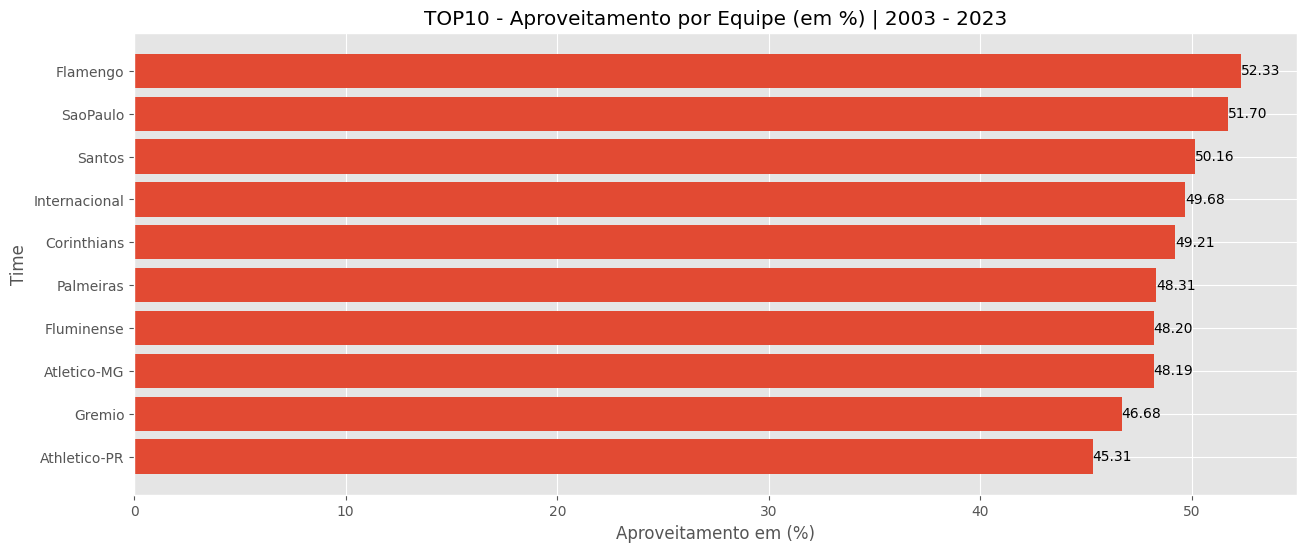

In [113]:
# Criando um gráfico de TOP10 aproveitamentos
top10_aproveitamento = aproveitamento_por_time.head(10)

# Para este tipo de gráfico terei que realizar um ajuste para que o maior valor apareça no início, ou seja, irei reverter a ordem dos valores
top10_aproveitamento = top10_aproveitamento.iloc[::-1]

plt.figure(figsize=(15,6))
bars = plt.barh(top10_aproveitamento.index, top10_aproveitamento.values)


# Agora vou adicionar um rótulo de dados para facilitar a leitura:

for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width():.2f}',
             va='center', ha='left', fontsize=10)

plt.xlabel('Aproveitamento em (%)')
plt.ylabel('Time')
plt.title('TOP10 - Aproveitamento por Equipe (em %) | 2003 - 2023')


Agora vamos verificar se as equipes que mais vencem partidas são as mais ofensivas e se são, o quanto são.

In [89]:
# Verificando a quantidade de gols marcados por equipe
qtd_gols_por_time = df.groupby('time')['gols_pro'].sum().sort_values(ascending = False)

In [30]:
df_10 = df.groupby('time')[['partidas_disputadas' ,'gols_pro', 'vitorias']].sum().sort_values(by='gols_pro', ascending = False)
df_10.head(10)

,partidas_disputadas,gols_pro,vitorias
time,,,
Santos,818,1178,340
Flamengo,818,1169,354
Atletico-MG,780,1131,327
SaoPaulo,780,1123,351
Fluminense,818,1097,322
Palmeiras,734,1077,329
Internacional,780,1041,339
Athletico-PR,780,1033,309
Gremio,738,1019,316


In [31]:
corr__vitorias_golsPro = df['vitorias'].corr(df['gols_pro'])
corr__vitorias_golsPro

0.7558143772226039

De fato, as equipes que mais vencem possuem a maior quantidade de Gols Pró e a correlação nos confirma isso, sendo uma correlação forte (próxima de 1)

Agora vamos verificar os Gols Contra com a quantidade de derrotas.

In [90]:
# Verificando a quantidade de gols sofridos por equipe
qtd_gols_sofidos_por_time = df.groupby('time')['gols_contra'].sum().sort_values(ascending = False)

In [33]:
df_10 = df.groupby('time')[['partidas_disputadas' ,'gols_contra','derrotas']].sum().sort_values(by='gols_contra', ascending = False)
df_10.head(10)

,partidas_disputadas,gols_contra,derrotas
time,,,
Fluminense,818,1031,283
Santos,818,982,261
Atletico-MG,780,978,254
Athletico-PR,780,965,282
Flamengo,818,962,243
Vasco,628,881,234
Botafogo,696,881,259
Internacional,780,853,239
Cruzeiro,704,850,235


In [34]:
corr_derrotas_golsContra = df['derrotas'].corr(df['gols_contra'])
corr_derrotas_golsContra

0.7422382352126731

Notamos que essa correlação é muito próxima da vista anteriormente, a de Vitórias com Gols Pró. Agora praticamente já confirmamos isso mas, para deixar a análise completa vamos verificar o saldo de gols, dessa vez com uma visão mais abrangente e relacionando com a quantidade de vitórias também.

In [35]:
# Verificando o saldo de gols por equipe
saldo_gols_por_time = df.groupby('time')['saldo_gols'].sum().sort_values(ascending = False)
saldo_gols_por_time.head(20)

time
SaoPaulo         282
Palmeiras        237
Flamengo         207
Santos           196
Internacional    188
Gremio           185
Corinthians      167
Cruzeiro         163
Atletico-MG      150
Athletico-PR      68
Fluminense        66
RBBragantino      23
SaoCaetano        10
Botafogo          -5
Cuiaba           -13
SantoAndre       -15
Barueri          -18
Brasiliense      -20
Portuguesa       -20
Joinville        -22
Name: saldo_gols, dtype: int64

In [36]:
df_20 = df.groupby('time')[['partidas_disputadas' ,'saldo_gols','vitorias']].sum().sort_values(by='saldo_gols', ascending = False)
df_20.head(20)

,partidas_disputadas,saldo_gols,vitorias
time,,,
SaoPaulo,780,282,351
Palmeiras,734,237,329
Flamengo,818,207,354
Santos,818,196,340
Internacional,780,188,339
Gremio,738,185,316
Corinthians,780,167,326
Cruzeiro,704,163,304
Atletico-MG,780,150,327


In [37]:
corr_saldo_vitorias = df['saldo_gols'].corr(df['vitorias'])
corr_saldo_vitorias

0.8664559594560285

In [38]:
corr_saldo_derrotas = df['saldo_gols'].corr(df['derrotas'])
corr_saldo_derrotas

-0.8669447033882737

Neste caso, apenas estou confirmando o que já havia visto nas análises anteriores e validando que a análise de Saldo com Derrotas deveria ser inversamente proporcional à de Saldo com Vitórias, o que se confirmou.

Contudo, verificamos aqui que existem equipes que tem uma quantidade de partidas disputadas muito menor do que outras, o que irá me levar para uma análise de médias.

Vou verificar agora, em média, qual a equipe mais ofensiva nessa série histórica.

In [39]:
df2 = df.groupby('time')[['partidas_disputadas', 'gols_pro']].sum().sort_values(by='gols_pro', ascending = False)
df2['MediaGolsPro'] = df2['gols_pro'] / df2['partidas_disputadas']
df2.sort_values(by='MediaGolsPro', ascending = False)

,partidas_disputadas,gols_pro,MediaGolsPro
time,,,
Palmeiras,734,1077,1.467302
Atletico-MG,780,1131,1.450000
Paysandu,134,193,1.440299
Santos,818,1178,1.440098
SaoPaulo,780,1123,1.439744
Cruzeiro,704,1013,1.438920
Flamengo,818,1169,1.429095
Gremio,738,1019,1.380759
Fluminense,818,1097,1.341076


In [40]:
paysandu = df.loc[df['time'] == 'Paysandu'].sum()
paysandu = paysandu.drop(['sigla', 'time', 'aproveitamento', 'temporada', 'colocacao'])
paysandu

pontos                 146
partidas_disputadas    134
vitorias                41
empates                 31
derrotas                62
gols_pro               193
gols_contra            245
saldo_gols             -52
pontos_possiveis       402
dtype: object

In [41]:
palmeiras = df.loc[df['time'] == 'Palmeiras'].sum()
palmeiras = palmeiras.drop(['sigla', 'time', 'aproveitamento', 'temporada', 'colocacao'])
palmeiras

pontos                 1177
partidas_disputadas     734
vitorias                329
empates                 190
derrotas                215
gols_pro               1077
gols_contra             840
saldo_gols              237
pontos_possiveis       2202
dtype: object

Verificamos que, em média, o Paysandu é uma das equipes mais ofensivas no entanto, disputou apenas 134 partidas contra 818 do Santos.. isso claramente não é uma análise justa, visto que manter a consistência que o Paysandu teve durante 734 partidas é muito mais difícil do que por apenas 134.

Portanto, vamos estipular um filtro aqui de apenas equipes com mais de 500 partidas disputadas para a nossa análise.

In [42]:
df_gPro = df.groupby('time')[['partidas_disputadas', 'gols_pro']].sum().sort_values(by='gols_pro', ascending = False)
df_gPro = df_gPro[df_gPro['partidas_disputadas'] >= 500]
df_gPro['MediaGolsPro'] = df_gPro['gols_pro'] / df_gPro['partidas_disputadas']
df_gPro.sort_values(by='MediaGolsPro', ascending = False)

,partidas_disputadas,gols_pro,MediaGolsPro
time,,,
Palmeiras,734,1077,1.467302
Atletico-MG,780,1131,1.450000
Santos,818,1178,1.440098
SaoPaulo,780,1123,1.439744
Cruzeiro,704,1013,1.438920
Flamengo,818,1169,1.429095
Gremio,738,1019,1.380759
Fluminense,818,1097,1.341076
Goias,590,789,1.337288


Agora temos uma visão justa e mais coerente, visto que todas as equipes possuem uma boa amostragem de partidas para analisarmos esses valores.

Agora partindo para a lógica contrária, vamos verificar os times com as melhores defesas ainda com o filtro de >= 500 partidas disputadas.

In [43]:
df_gContra = df.groupby('time')[['partidas_disputadas', 'gols_contra']].sum().sort_values(by='gols_contra', ascending = False)
df_gContra = df_gContra[df_gContra['partidas_disputadas'] >= 500]
df_gContra['MediaGolsContra'] = df_gContra['gols_contra'] / df_gContra['partidas_disputadas']
df_gContra.sort_values(by='MediaGolsContra', ascending = True)

,partidas_disputadas,gols_contra,MediaGolsContra
time,,,
Corinthians,780,832,1.066667
SaoPaulo,780,841,1.078205
Internacional,780,853,1.093590
Gremio,738,834,1.130081
Palmeiras,734,840,1.144414
Flamengo,818,962,1.176039
Santos,818,982,1.200489
Cruzeiro,704,850,1.207386
Athletico-PR,780,965,1.237179


Após ter essas visões mais detalhadas e conseguir enxergar melhor os dados, vamos realizar uma análise de correlação abrangendo mais dados.

In [44]:
df4 = df.groupby('time')[['partidas_disputadas', 'pontos', 'gols_pro', 'gols_contra', 'saldo_gols', 'vitorias', 'empates', 'derrotas', 'aproveitamento']].sum().sort_values(by='gols_pro', ascending = False)
df4.corr()

,partidas_disputadas,pontos,gols_pro,gols_contra,saldo_gols,vitorias,empates,derrotas,aproveitamento
partidas_disputadas,1.000000,0.990744,0.993101,0.986604,0.663451,0.986094,0.992094,0.970845,0.990263
pontos,0.990744,1.000000,0.996749,0.959180,0.756492,0.999212,0.982707,0.930770,0.999787
gols_pro,0.993101,0.996749,1.000000,0.972192,0.730082,0.995787,0.980835,0.944692,0.996066
gols_contra,0.986604,0.959180,0.972192,1.000000,0.549754,0.951896,0.973425,0.991881,0.957725
saldo_gols,0.663451,0.756492,0.730082,0.549754,1.000000,0.774314,0.658152,0.475381,0.758277
vitorias,0.986094,0.999212,0.995787,0.951896,0.774314,1.000000,0.974789,0.921494,0.998851
empates,0.992094,0.982707,0.980835,0.973425,0.658152,0.974789,1.000000,0.954795,0.982923
derrotas,0.970845,0.930770,0.944692,0.991881,0.475381,0.921494,0.954795,1.000000,0.929558
aproveitamento,0.990263,0.999787,0.996066,0.957725,0.758277,0.998851,0.982923,0.929558,1.000000


In [45]:
df['MediaGolsPro'] = df['gols_pro'] / df['partidas_disputadas']
df['MediaGolsContra'] = df['gols_contra'] / df['partidas_disputadas']

Text(0.5, 1.0, 'TOP10 Clubes - Média de Gols Pró por Partida | 2003 - 2023')

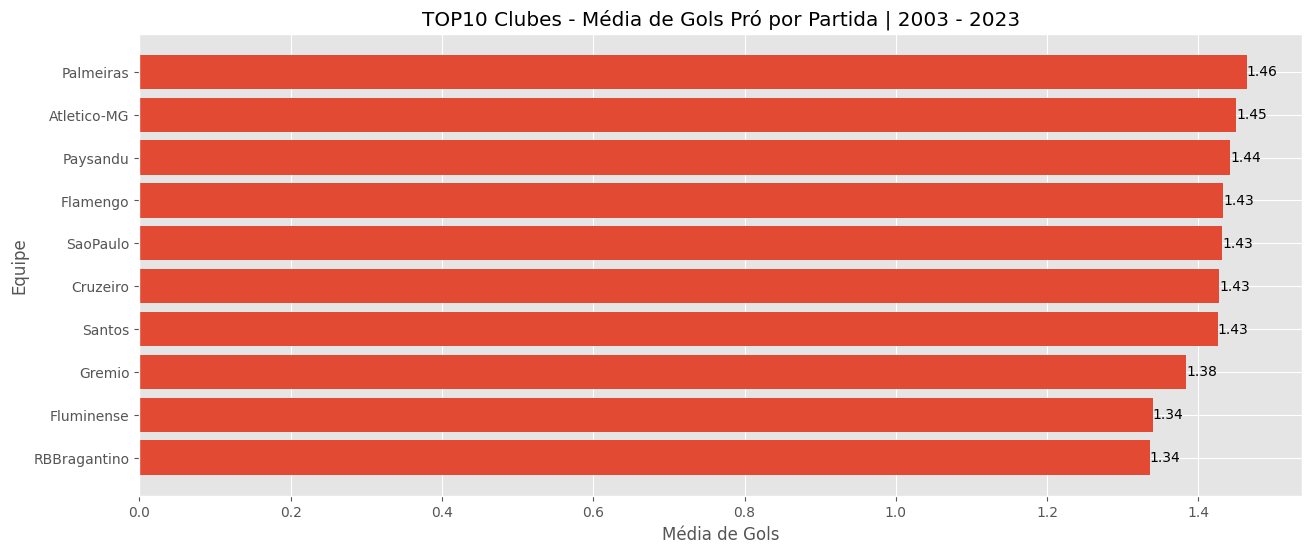

In [104]:
# Plotando um gráfico dos TOP10 times que tem a melhor média de gols marcados
med_golsPro = df.groupby('time')['MediaGolsPro'].mean().sort_values(ascending = False)
med_golsPro = med_golsPro.head(10)

plt.figure(figsize=(15,6))
bars = plt.barh(med_golsPro.index, med_golsPro.values, color='skyblue')
plt.barh(med_golsPro.index, med_golsPro.values)

# Agora vou adicionar um rótulo de dados para facilitar a leitura:

for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width():.2f}',
             va='center', ha='left', fontsize=10)

plt.xlabel('Média de Gols')
plt.ylabel('Equipe')
plt.gca().invert_yaxis()
plt.title('TOP10 Clubes - Média de Gols Pró por Partida | 2003 - 2023')

Text(0.5, 1.0, 'TOP10 Clubes - Média de Gols Sofridos por Partida | 2003 - 2023')

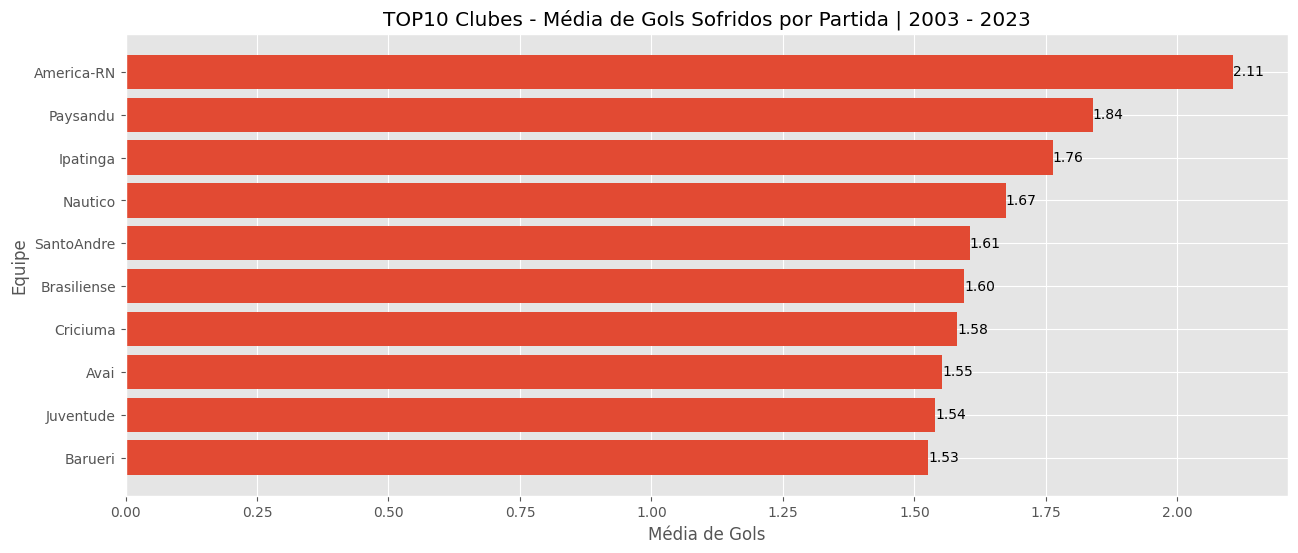

In [103]:
med_golsContra = df.groupby('time')['MediaGolsContra'].mean().sort_values(ascending = False)
med_golsContra = med_golsContra.head(10)

plt.figure(figsize=(15,6))
bars = plt.barh(med_golsContra.index, med_golsContra.values, color='skyblue')
plt.barh(med_golsContra.index, med_golsContra.values)

# Agora vou adicionar um rótulo de dados para facilitar a leitura:

for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width():.2f}',
             va='center', ha='left', fontsize=10)

plt.xlabel('Média de Gols')
plt.ylabel('Equipe')
plt.gca().invert_yaxis()
plt.title('TOP10 Clubes - Média de Gols Sofridos por Partida | 2003 - 2023')

Aproveitando que o dataframe possui a dados de vários anos, vamos acompanhar como foi a variação dos gols ao longo do tempo, será que o campeonato ficou mais ofensivo ou defensivo?

In [48]:
df.head(3)

,temporada,colocacao,sigla,time,pontos,partidas_disputadas,vitorias,empates,derrotas,gols_pro,gols_contra,saldo_gols,pontos_possiveis,aproveitamento,MediaGolsPro,MediaGolsContra
0,2003,1,CRU,Cruzeiro,100,46,31,7,8,102,47,55,138,72.463768,2.217391,1.021739
1,2003,2,SAN,Santos,87,46,25,12,9,93,60,33,138,63.043478,2.021739,1.304348
2,2003,3,SAO,SaoPaulo,78,46,22,12,12,81,67,14,138,56.521739,1.760870,1.456522


In [58]:
# Vou definir aqui as variáveis a serem utilizadas ao longo dessa análise
gols_pro_anos = df.groupby('temporada')['gols_pro'].sum()

# Agora vou calcular a média de gols ao longo dos anos para poder inserir uma linha média no gráfico
media_gols = gols_pro_anos.mean()

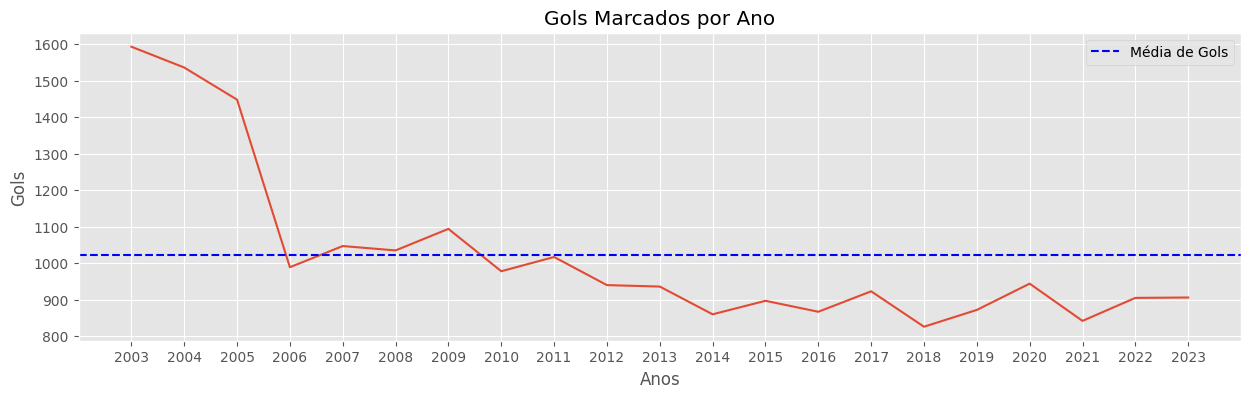

In [62]:
plt.figure(figsize=(15,4))
plt.plot(gols_pro_anos.index, gols_pro_anos.values)

#Aqui vou inserir a linha de média
plt.axhline(y=media_gols, color='blue', linestyle='--', label=f'Média de Gols')
plt.xlabel('Anos')
plt.ylabel('Gols')
plt.title('Gols Marcados por Ano')
plt.legend()

Pode-se notar portanto que desde 2011 os campeonatos acontecem com uma média de gols abaixo da série histórica..

De primeira análise, podemos pensar que o campeonato ficou mais defensivo e/ou retranqueiro, mas também devemos levar em consideração que o futebol mudou consideravelmente nas últimas décadas e a competitividade aumentou muito o que impacta diretamente na queda expressiva de gols marcados.